# Multi Layer Perceptron Classifier

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sb

import warnings
from collections import Counter
import datetime


from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

def accuracy(confusion_matrix):
   diagonal_sum = confusion_matrix.trace()
   sum_of_all_elements = confusion_matrix.sum()
   return diagonal_sum / sum_of_all_elements

# Importing cleaned dataset with relevant features

This new dataset only include 2020 onwards data with features such as the video category, views, likes, comments

In [2]:
df = pd.read_csv("same_publishing_timing.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21513 entries, 0 to 21512
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   title                      21513 non-null  object
 1   publishedAt                21513 non-null  object
 2   categoryId                 21513 non-null  int64 
 3   trending_date              21513 non-null  object
 4   view_count                 21513 non-null  int64 
 5   likes                      21513 non-null  int64 
 6   dislikes                   21513 non-null  int64 
 7   comment_count              21513 non-null  int64 
 8   comments_disabled          21513 non-null  bool  
 9   Number_of_days_it_trended  21513 non-null  int64 
dtypes: bool(1), int64(6), object(3)
memory usage: 1.5+ MB


In [4]:
dataset = df[['categoryId','view_count', 'likes', 'comment_count']]
target = df[['Number_of_days_it_trended']]

Splitting the prepared data to train and test data randomly at 3:1 ratio

In [5]:
#Setting 2 hidden layer sizes
num_neurons = 100

In [6]:
classifier = MLPClassifier(hidden_layer_sizes=num_neurons, max_iter=35, activation='relu', solver='sgd', random_state=762, learning_rate='invscaling')
dataset_train, dataset_test, target_train, target_test = train_test_split(dataset, target, test_size=0.25)
classifier.fit(dataset_train, target_train)
target_test_predicted = classifier.predict(dataset_test)
cm = confusion_matrix(target_test_predicted, target_test)

#Printing the accuracy
print("Accuracy of MLPClassifier : ",round(accuracy(cm)*100, 1), '\b% (rounded to 1 decimal place)')

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Accuracy of MLPClassifier :  17.4 % (rounded to 1 decimal place)


We observe that the accuracy of this machine learning with this dataset is considerably low at 25%. This may be because our target spread is large where the trending days range from 1 to 47. Hence we will attempt to reduce the spread by further cleaning our dataset to include only videos that trended for 10 days and below.

In [7]:
df_15days = df[df['Number_of_days_it_trended'] < 15]
dataset_15days = df_15days[['categoryId','view_count', 'likes', 'comment_count']]
target_15days = df_15days[['Number_of_days_it_trended']]

In [8]:
classifier = MLPClassifier(hidden_layer_sizes=num_neurons, max_iter=35, activation='relu', solver='sgd', random_state=762, learning_rate='invscaling')
dataset_train, dataset_test, target_train, target_test = train_test_split(dataset_15days, target_15days, test_size=0.25)
classifier.fit(dataset_train, target_train)
target_test_predicted = classifier.predict(dataset_test)
cm = confusion_matrix(target_test_predicted, target_test)

#Printing the accuracy
print("Accuracy of MLPClassifier : ",round(accuracy(cm)*100, 1), '\b% (rounded to 1 decimal place)')

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Accuracy of MLPClassifier :  22.6 % (rounded to 1 decimal place)


Even though we reduced the target spread, the accuracy did not improve, we will further reduce the target spread to 10

In [9]:
df_10days = df[df['Number_of_days_it_trended'] < 10]
dataset_10days = df_10days[['categoryId','view_count', 'likes', 'comment_count']]
target_10days = df_10days[['Number_of_days_it_trended']]

In [10]:
classifier = MLPClassifier(hidden_layer_sizes=num_neurons, max_iter=35, activation='relu', solver='sgd', random_state=762, learning_rate='invscaling')
dataset_train, dataset_test, target_train, target_test = train_test_split(dataset_10days, target_10days, test_size=0.25)
classifier.fit(dataset_train, target_train)
target_test_predicted = classifier.predict(dataset_test)
cm = confusion_matrix(target_test_predicted, target_test)

#Printing the accuracy
print("Accuracy of MLPClassifier : ",round(accuracy(cm)*100, 1), '\b% (rounded to 1 decimal place)')

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Accuracy of MLPClassifier :  22.6 % (rounded to 1 decimal place)


We now see a better accuracy compared to the previous 2 datasets. We will try to reduce the dataset target spread to below 5 days

In [11]:
df_5days = df[df['Number_of_days_it_trended'] < 5]
dataset_5days = df_5days[['categoryId','view_count', 'likes', 'comment_count']]
target_5days = df_5days[['Number_of_days_it_trended']]

In [12]:
classifier = MLPClassifier(hidden_layer_sizes=num_neurons, max_iter=35, activation='relu', solver='sgd', random_state=762, learning_rate='invscaling')
dataset_train, dataset_test, target_train, target_test = train_test_split(dataset_5days, target_5days, test_size=0.25)
classifier.fit(dataset_train, target_train)
target_test_predicted = classifier.predict(dataset_test)
cm = confusion_matrix(target_test_predicted, target_test)

#Printing the accuracy
print("Accuracy of MLPClassifier : ",round(accuracy(cm)*100, 1), '\b% (rounded to 1 decimal place)')

Accuracy of MLPClassifier :  22.4 % (rounded to 1 decimal place)


C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


We see a bigger improvement in our accuracy to our model now after limiting the our target spread to just 5 days and below.

# Improving our model

Even though reducing the target spread has improved the accuracy of the predictions of trending days, a 25% accuracy rate is still too low. Therefore, we will now attempt to increase our hidden layers to 10000 from 100 which was used in the above model.

We will also calculate the accuracy for this new model with 10000 layers with maximum target trending days of below 5, 10, 15, 20, 25, 30, 35, 40, 45, 50 and check how the accuracy varies using a simple graph plot.

In [13]:
# We will see how the accuracy differs when adjusting the spread for the maximum trend days we want to predict
max_trend_days = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]

#we will model the accuracy for each of this and store it in another list with its respective index in max_trend_days
accuracy_result = []

for x in max_trend_days:
    df2 = df[df['Number_of_days_it_trended'] < x]
    dataset = df2[['categoryId','view_count', 'likes', 'comment_count']]
    target = df2[['Number_of_days_it_trended']]
    classifier = MLPClassifier(hidden_layer_sizes=10000, max_iter=35, activation='relu', solver='sgd', random_state=762, learning_rate='invscaling')
    
    dataset_train, dataset_test, target_train, target_test = train_test_split(dataset, target, test_size=0.25)
    
    classifier.fit(dataset_train, target_train)
    target_test_predicted = classifier.predict(dataset_test)
    cm = confusion_matrix(target_test_predicted, target_test)
    
    accuracy_result.append(accuracy(cm))

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

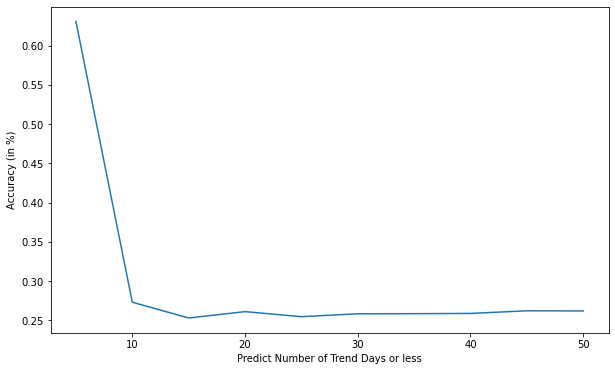

In [14]:
for k in (accuracy_result):
    k = k*100
    k = round(k, 1)
    


fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(max_trend_days, accuracy_result)
_ = ax.set(xlabel="Predict Number of Trend Days or less", ylabel="Accuracy (in %)")

In [17]:
print(round(accuracy_result[0]*100, 1), "\b%")

63.1 %


From the simple graph plot above, we notice a sharp increase in accuracy when our target trending days to predict is cap at 10. Beyond that, the accuracy of that is very much similar to that of the previous model with 100 hidden layers. Although with 10000 layers, we now are able to better predict the youtube videos trending days cap at 10.

# Conclusion

Predicting the trend of a video is more than just looking at its views, comments, categories and likes. The most important parts of a youtube video which makes it go viral may be its thumbnail and its video content which we are unable to use to train our machine learning model. Therefore, the capabilities of our machine learning model to model a video's ability to maintain its trending status is limited. However that does not mean we are completely unable to do so, a trending video should still have some basic characteristics such as high likes, comments and views which means the video may be actively being shared between viewers' social circle which can make it trend more, this may be especially so for videos in the news category which may be trending for a few days and slowly fade away. This explains why there is a steep decline in the accuracy of our model as the trending days to predict increases.